In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Analyse Moyenne-Variance

### Cas n = 2

Dans un premier temps, exposons la théorie de Markowitz et de son analyse moyenne-variance dans le cas particulier où notre portefeuille contient 2 actifs, A et B.

Concentrons nous tout d'abord sur l'impact de la diversification du portefeuille. Pour rappel, la diversification du portefeuille, dans sa plus simple des formes, est représentée par les coefficients de corrélations linéaires entre les différents actifs qui le composent.

Un portefeuille diversifié doit être construit de telle sorte que les actifs qui le composent soient faiblement voir négativement corrélés entre eux ce qui tendrait à stabiliser la volatilité globale du portefeuille. Les actifs n'évoluent pas dans la même direction ou du moins pas avec la même intensité.

Dans la cellule suivante, je vais vous illustrer l'impact de ce coefficient en construisant dans le plan (sigma_p, mu_p) les graphes représentants l'ensemble des portefeuilles pour un certain coefficient de corrélation.

In [2]:
# Paramètres
mu_a = 0.02  # Moyenne des rendements de l'actif A
mu_b = 0.05  # Moyenne des rendements de l'actif B
sigma_a = 0.10  # Écart-type des rendements de l'actif A
sigma_b = 0.20  # Écart-type des rendements de l'actif B
w_a = np.linspace(0, 1, 100) # Liste des poids appliqués à l'actif A
w_b = 1 - w_a # Liste des poids appliqués à l'actif B

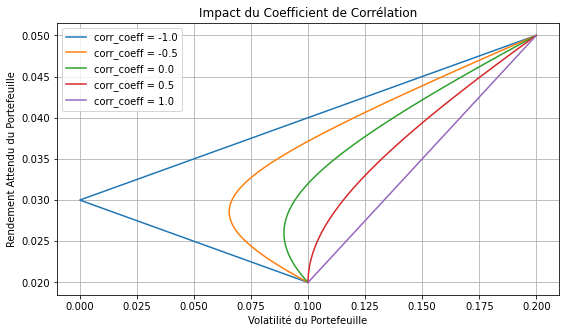

In [3]:
# Tracé des figures
plt.figure(figsize=(9, 5))
for corr_coeff in np.linspace(-1, 1, 5):
    mu_p = w_a * mu_a + w_b * mu_b
    sigma_p = np.sqrt((w_a * sigma_a)**2 + (w_b * sigma_b)**2 + 2 * w_a * w_b * corr_coeff * sigma_a * sigma_b)
    plt.plot(sigma_p, mu_p, label=f"corr_coeff = {corr_coeff}")

plt.xlabel('Volatilité du Portefeuille')
plt.ylabel('Rendement Attendu du Portefeuille')
plt.title('Impact du Coefficient de Corrélation')
plt.legend()
plt.grid(True)
plt.show()

### Conclusions graphiques et théoriques

Ainsi, nous observons nettement que plus le coefficient de corrélation entre les deux actifs est bas plus le niveau de risque pour un même rendement l'est aussi. 

Markowitz a ainsi démontré l'intérêt fondamental de la diversification dans l'investissement en expliquant que si nous prenons deux portefeuilles différents par les actifs qui les composent et par leurs corrélations linéaires entre eux, mais similaires par les performances et les niveaux de risques individuels, alors le portefeuille présentant les actifs les moins corrélés entre eux saura moins risqué pour un même niveau de rendement.

La diversification ne vise pas à maximiser le rendement mais à minimiser le risque pour un même niveau de rendement.
Mathématiquement, on dira que l'esperance de rendement n'est pas fonction du coeff de corrélation.

$$
\mu_P = w_A \cdot \mu_A + w_B \cdot \mu_B
$$


Analysons désormais plus en profondeur les cas pour des valeurs particulières du coefficient de corrélation.

- Cas corr_coef = 1

$$
\sigma^2_p = w_A^2 \cdot \sigma_A^2 + w_B^2 \cdot \sigma_B^2 + 2 \cdot w_A \cdot w_B \cdot \sigma_A \cdot \sigma_B
$$

Graphiquement pour ce cas, nous observons que les deux actifs sont réliés par un segment de droite. Cette progession linéaire s'explique par le fait que pour un coeff égal à 1. La rentabilité espérée et le risque du portefeuille sont des moyennes pondérées resp. de la rentabilité espérées et du risque des deux titres.

Dans ce cas de figure, il est clair qu'il est impossible d'obtenir un niveau de risque inférieur à celui de l'actif le moins risqué. 

- Cas -1 < corr_coef < 1

Pour rappel, P est un portefeuille composé d'un actif A et d'un actif B.
Notons x et (1-x) leur poids respectif dans le portefeuille.

Determinons dans ces cas, le poids de variance minimale qui correspond à la dérivée première de la variance du portefeuille par rapport.

$$
\sigma^2_p = x^2 \cdot \sigma^2_A + (1 - x)^2 \cdot \sigma^2_B + 2 \cdot x \cdot (1 - x) \cdot \rho \cdot \sigma_A \cdot \sigma_B
$$

$$
\frac{d}{dx} (\sigma^2_p) = x \cdot \sigma^2_A - (1 - x) \cdot \sigma^2_B + (1 - 2x) \cdot \rho \cdot \sigma_A \cdot \sigma_B = 0
$$

$$
x* = \frac{\sigma^2_B - \rho \cdot \sigma_A \cdot \sigma_B}{(\sigma^2_A + \sigma^2_B - \rho \cdot \sigma_A \cdot \sigma_B)}
$$

Ainsi, pour ce portefeuille nous avons la variance suivante:

$$
\sigma^2_p = \frac{\sigma^2_A \sigma^2_B (1 - \rho^2)}{\sigma^2_A + \sigma^2_B - 2 \rho \sigma_A \sigma_B}
$$

En supposant que l'actif A est l'actif avec la variance la plus faible et donc le moins risqué, calculons le delta de risque entre ces deux grandeurs.

$$
\delta = - \frac{\sigma^2_A (\sigma_A - \rho \sigma_B)^2}{\sigma^2_A + \sigma^2_B - 2 \rho {\sigma_A \sigma_B}} 
$$

Ainsi on comprend que si le coefficient n'est pas égal au rapport des écarts type avec au numérateur l'écart type de l'actif A (le moins risqué), le rendement du portefeuille sera toujours inférieur à celui de l'actif le moins risqué.

Ce que l'on peut aussi en déduire vis à vis de la valeur de x* est que si le coefficient de corrélation est supérieur à ce rapport alors la valeur du poids sera positive, sinon elle sera négative et on sera dans le cadre d'une vente à découvert sur l'actif A et d'un achat à effet de levier sur l'actif B.

En revanche, si le coefficient de corrélation est égal à ce rapport alors le niveau de risque du portefeuille sera égal à celui de l'actif le moins risqué. Seul cas où la diversification ne joue pas (Cf. courbe --> corr_coef = 0.5).

- Cas corr_coef = -1

Seul cas où le niveau de risque minimal est nul, pour une certain allocation.

<u>Conclusion</u>:

Si nous devons retenir une chose c'est que la diversification joue son rôle de minimiseur de risque à partir du moment où le coefficient de corrélation est inférieur à 1 et différent du rapport des deux ecart types (moins risqué au numérateur).

Coefficient de corrélation: -1.0
Ponderation actif A 0.6667
Pondération actif B 0.3333
Rendement du portefeuille 0.03
Volatilité du portefeuille 0.0


Coefficient de corrélation: -0.5
Ponderation actif A 0.7143
Pondération actif B 0.2857
Rendement du portefeuille 0.0286
Volatilité du portefeuille 0.0655


Coefficient de corrélation: 0.0
Ponderation actif A 0.8
Pondération actif B 0.2
Rendement du portefeuille 0.026
Volatilité du portefeuille 0.0894


Coefficient de corrélation: 0.5
Ponderation actif A 1.0
Pondération actif B 0.0
Rendement du portefeuille 0.02
Volatilité du portefeuille 0.1


Coefficient de corrélation: 1.0
Ponderation actif A 2.0
Pondération actif B -1.0
Rendement du portefeuille -0.01
Volatilité du portefeuille 0.0




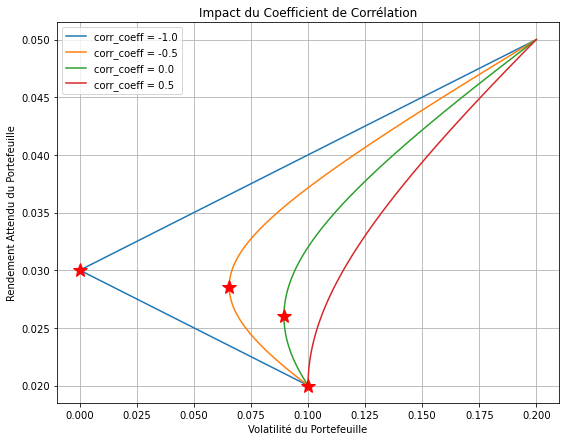

In [12]:
# Tracés des figures avec en plus le point de variance minimale
plt.figure(figsize=(9, 7))
for corr_coeff in np.linspace(-1, 1, 5):
    mu_p = w_a * mu_a + w_b * mu_b
    sigma_p = np.sqrt(w_a**2 * sigma_a**2 + w_b**2 * sigma_b**2 + 2 * w_a * w_b * corr_coeff * sigma_a * sigma_b)
    # Reporting
    x = (sigma_b**2 - corr_coeff * sigma_a * sigma_b) / (sigma_a**2 + sigma_b**2 - 2 * corr_coeff * sigma_a * sigma_b)
    mu_p_var_min = x * mu_a + (1-x) * mu_b
    sigma_p_min = np.sqrt(x**2 * sigma_a**2 + (1 - x)**2 * sigma_b**2 + 2 * x * (1 - x) * corr_coeff * sigma_a * sigma_b)
    print("Coefficient de corrélation:", corr_coeff)
    print("Ponderation actif A", round(x, 4))
    print("Pondération actif B", round(1-x, 4))
    print("Rendement du portefeuille", round(mu_p_var_min, 4))
    print("Volatilité du portefeuille", round(sigma_p_min, 4))
    print("\n")
    # Tracés
    if corr_coeff == 1.0: # Cas vente à découvert
        continue
    plt.plot(sigma_p, mu_p, label=f"corr_coeff = {corr_coeff}")
    plt.plot(sigma_p_min, mu_p_var_min, color="red", marker="*", markersize=15)

    
plt.xlabel('Volatilité du Portefeuille')
plt.ylabel('Rendement Attendu du Portefeuille')
plt.title('Impact du Coefficient de Corrélation')
plt.legend()
plt.grid(True)
plt.show()

### Cas à n actifs

Considérons désormais un portefeuille composé de n actifs risqués avec n > 2.

w : vecteur R^n contenant les poids attribués à chaque actifs

$$
w = \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
$$

R : vecteur R^n contenant les rentabilités de chaque actifs

$$
\mu = \begin{bmatrix}
\mu_1 \\
\mu_2 \\
\vdots \\
\mu_n
\end{bmatrix}
$$

e : vecteur de R^n dont toutes les composantes sont égales à 1

V : matrice de variances-covariances (n, n) des rentabilités des actifs financiers. On supposera que notre portefeuille est diversifié et que chaque actif n'est pas linéairement dépendant aux autres, ainsi nous considérerons que cette matrice est inversible. Cette hypothèse nous permettra de bénéficier de certaines propriétés simplificatrices.

La diversification garantit l'hypothése d'une solution unique pour les problèmes d'optimisations à suivre. 

$$
\Sigma = \begin{bmatrix}
\sigma_{1}^2 & \sigma_{1,2} & \cdots & \sigma_{1,n} \\
\sigma_{2,1} & \sigma_{2}^2 & \cdots & \sigma_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n,1} & \sigma_{n,2} & \cdots & \sigma_{n}^2
\end{bmatrix}
$$

Rendement espéré du portefeuille

$$
E(R_p) = \mathbf{w}^T \cdot \boldsymbol{\mu} = \sum_{i=1}^{n} w_i \cdot \mu_i
$$

Variance attendue du portefeuille

$$
\sigma^2_p = \mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w} = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i \cdot w_j \cdot \sigma_{ij} = \sum_{i=1}^{n} w_i^2 \cdot \sigma_i^2 + 2 \cdot \sum_{i=1}^{n} \sum_{j=i+1}^{n} w_i \cdot w_j \cdot \sigma_{ij}
$$

Calculons désormais la dérivée partielle de cette variance par rapport au poids du vecteur w du portefeuille:

$$
\frac{\partial \sigma_p^2}{\partial w_i} = \frac{\partial}{\partial w_i} (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})
$$

$$
\frac{\partial \sigma_p^2}{\partial w_i} = \frac{\partial (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})}{\partial (\mathbf{w}^T)} \cdot \frac{\partial (\mathbf{w}^T)}{\partial w_i} + \frac{\partial (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})}{\partial \boldsymbol{\Sigma}} \cdot \frac{\partial \boldsymbol{\Sigma}}{\partial w_i} + \frac{\partial (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})}{\partial \mathbf{w}} \cdot \frac{\partial \mathbf{w}}{\partial w_i}
$$

$$
\frac{\partial \sigma_p^2}{\partial w_i} = 2 \cdot (\boldsymbol{\Sigma} \cdot \mathbf{w})_i = 2 \cdot \sum_{j=1}^{n} \sigma_{ij} \cdot w_j
$$


Cette dernière expression montre que la contribution marginale d'un titre au risque total du portefeuille se mesure par la covariance entre les rendements de l'actif et ceux du portefeuille. De même, on peut démontrer cette même propriété en appliquant une équipondération des actifs du portefeuille à 1/n (Hint: mettre en évidence deux moyennes).

Vous pourrez conclure qu'un portefeuille comprenant un grand nombre d'actifs voit sa variance tendre vers sa covariance moyenne. Ceci indique que dans le contexte d'un portefeuille bien diversifié seules les covariances impactent le portefeuille.

La determination de l'ensemble des portefeuilles minimisant la variance pour une espérance de rentabilité fixée passe par la résolution du problème d'optimisation quadratique :

- Rendement espéré fixé : $w^T \mu = \bar{r}_p$ (contrainte de rendement)
- Somme des poids égale à 1 : $w^T \mathbf{1} = 1$ (contrainte de budget)

La fonction objective à minimiser est : $\sigma_p^2 = w^T \Sigma w$

Notez ici qu'il n'y aucune contrainte de non négativité des poids ce qui signifie que les ventes à découvert sont autorisées.

Ainsi, par la méthode des lagrangiens, le problème d'optimisation sous contrainte devient le problème d'optimisation libre suivant:

$$
Min[\mathcal{L}(w, \lambda, \alpha) = w^T \Sigma w + \lambda (\bar{r}_p - w^T \mu) + \alpha (w^T \mathbf{1} - 1)]
$$

Ainsi, les conditions necessaires du premier ordre sont:

$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial w} &= 2 \Sigma w - \lambda \mu + \alpha \mathbf{1} = 0 \\
\frac{\partial \mathcal{L}}{\partial \lambda} &= \bar{r}_p - w^T \mu = 0 \\
\frac{\partial \mathcal{L}}{\partial \alpha} &= w^T \mathbf{1} - 1 = 0
\end{align*}
$$

Biensûr, aucun actif n'est considéré comme redondant c'est à dire comme combinaison linéaire d'autres actifs marchés.
La matrice de variance-covariance est inversible et cette matrice est définie positive par nature de ses coefficients.

L'inversibilité de la matrice de variance-covariance (Σ) signifie que cette matrice est non singulière, c'est-à-dire qu'elle ne possède pas d'inversion. Cela est essentiel pour que le système d'équations de résolution du premier ordre puisse être résolu de manière unique pour obtenir les poids optimaux (w) ainsi que les multiplicateurs de Lagrange (λ et α) qui satisfont les conditions d'optimalité.

La définie positivité de la matrice de variance-covariance (Σ) garantit que la fonction objectif du problème d'optimisation est strictement convexe. Cela signifie que la fonction forme une "cuve" vers le bas et ne possède qu'un seul minimum global. En d'autres termes, il n'y a pas de crêtes ou de points de selle dans la fonction objectif qui pourraient induire des solutions non optimales.

Après résolution du système, nous obtenons comme valeurs pour les multiplicateurs:

$$
\lambda = 2 \cdot \frac{(C \cdot \bar{r}_p - A)}{d}
$$

$$
\delta = 2 \cdot \frac{(B - A \cdot \bar{r}_p)}{d}
$$

où

- $
A = e^T \cdot {\Sigma}^{-1} \cdot {\mu}^T
$

- $
B = {\mu}^T \cdot {\Sigma}^{-1}{\mu}
$

- $
C = e^T \cdot {\Sigma}^{-1} \cdot e
$

- $
d = BC - A^2
$

Ainsi, nous obtenons le vecteur d'allocation qui optimise notre portefeuille est égale à:

$$
w = \frac{1}{d} \cdot (B \cdot \Sigma^{-1}\cdot e - A \cdot \Sigma^{-1}\cdot\mu) + \bar{r}_p \cdot \frac{1}{d} \cdot (C \cdot \Sigma^{-1} \cdot \mu - A \cdot \Sigma^{-1} \cdot e)
$$

Ainsi nous pouvons différencier deux composante w1 et w2 qui ne dépendent pas de l'objectif d'espérance de rentabilité. Ces deux quantités sont uniquement dépendant des espérances de rendement individuels des titres, des leur variance et de leurs covariances.

Ainsi, on peut conclue que tout portefeuille de la frontière de variance minimale peut s'écrire comme la combinaison linéaire de deux portefeuilles spéciaux de rendement $(1-\bar{r_p})$ et $\bar{r_p}$.